# Ejercico de Regresion Logistica en Python

Para comenzar se realizan los import necesarios de los paquetes que se utilizan durante el Ejercicio.

# Ortega Hernandez Jose Manuel 1511304

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline



# Carga del archivo csv( datos de entrada)

El archivo csv (por simpicidad, se considera que estara en el mismo directorio que el archivo de notebook .ipynd) y se asigna mediante Pandas a la variable dataframe. Al utilizar el metodo dataframe.head() se visualiza en pantalla los 5 primeros registros.

In [2]:
dataframe = pd.read_csv(r"usuarios win-mac-lin.csv")

In [3]:
dataframe.head()


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


A continuacion se utiliza el metodo dataframe.describe() que proporcione estadistica descriptiva del coonjunto de datos: media, desviasion estandar, valores minimo y maximo de cada atributo.

In [4]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


Se cuantifican los resultados de cada tipo usando la funcion groupby y se visualizan 86 usuarios "clase 0", es decir windos, 40 usuarios de Mac y 44 de linux.

In [5]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


## Visualizamos los datos 

Se realizan una visualizacion paa conocer a los atributos caracteriticos de la informacion que se trabaja y su correlacion.

En formato de histograma a parecen los cuatro atributos de entrada etiquetados como: "duracion","Paguinas","acciones" y "valor".Se puede apreciar graficamente entre que valores se comprenden sus minimos y maximos y en que intervalos se concentra la mayor densidad de registros.

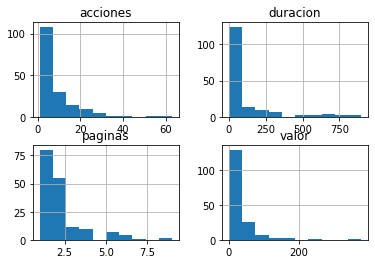

In [6]:
dataframe.drop(['clase'],1).hist()
plt.show()


Ademas se pueden interrelacionar las entradas de a pares, para ver como se concentran linealmente las salidas de usuarios por colores: Sistema Operativo Windows en azul, Macintosh en verde y Linux en rojo.

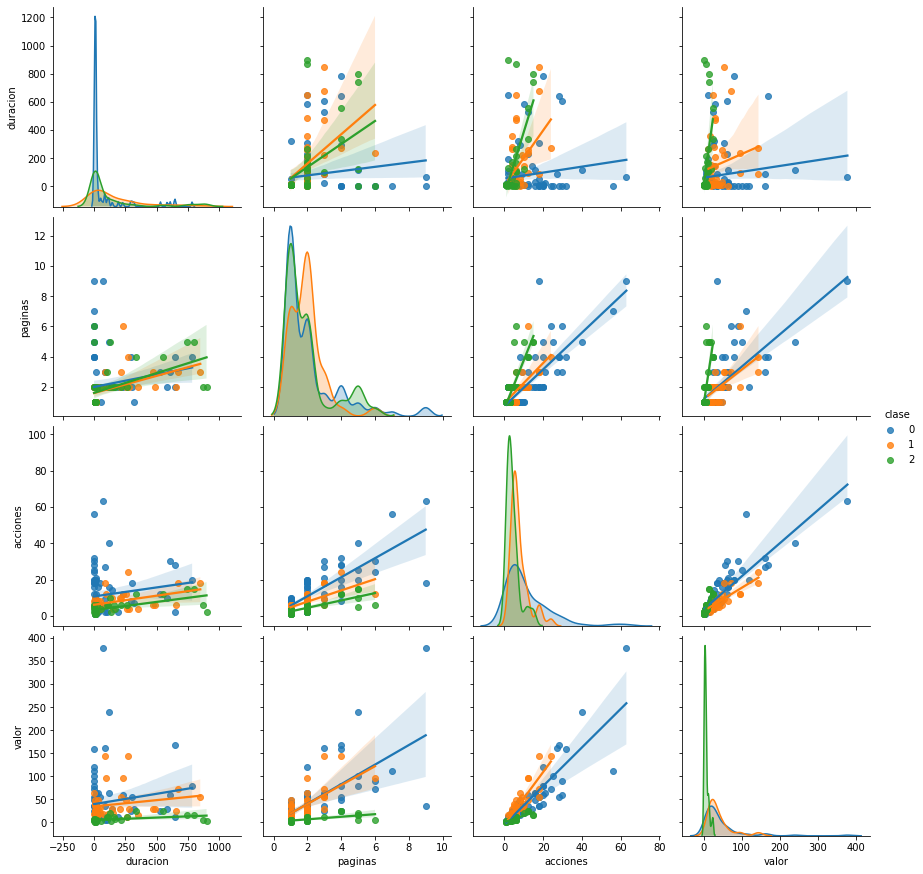

In [8]:
sb.pairplot(dataframe.dropna(), hue='clase', height=3, vars=["duracion","paginas","acciones","valor"],kind='reg')

## Se establece el moelo de R Log

Se cargan los atributos de las 4 columnas de entrada de X excluyendo la columna "clase" con el medoto drop(). La columna "clase" se agrega el atributo y se ejecuta X.shape para comprobar la dimension de lamatriz con datos de entrada de 170 registros por 4 columnas.

In [12]:
x = np.array(dataframe.drop(['clase'],1))
y = np.array(dataframe['clase'])
x.shape

(170, 4)

Y se crea el modelo de RLog haciendo que se auste (fit) al conjunto de entradas X y salidas 'y'.

In [13]:
model = linear_model.LogisticRegression()
model.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Una vez compilado el modelo, se clasifica todo el conjunto de entradas 'x' utilizando el metodo "predict(x)". Si se revisn algunas de sus salidas se pueden ver como coincide con las salidas reales del archivo csv.

In [14]:
predictions = model.predict(x)
print(predictions[0:5])

[2 2 2 2 2]


y se confirma el desempenoddel modelo utilizado model.score()el cual devuelve la precision media de las precciones, para este caso del 77%

In [15]:
model.score(x,y)

0.7823529411764706